In [33]:
!pip install transformers pillow cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00


In [56]:
from transformers import ViTFeatureExtractor, ViTImageProcessor,ViTForImageClassification,AutoFeatureExtractor, AutoModelForImageClassification
from PIL import Image
import requests
import torch
from io import BytesIO
import torch.nn.functional as F
import cairosvg

In [75]:
url = "https://images.unsplash.com/photo-1589571894960-20bbe2828d0a"
image = Image.open(requests.get(url, stream=True).raw)


In [76]:
# extract feature from image using the pre-fiend extractor
extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
# pre-processing image
input = extractor(images=image, return_tensors="pt")
# it is a preprocessed model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
#do inference
with torch.no_grad():
    outputs = model(**input)

In [77]:
# output
# after finishing prediction, they return to each score
scores = outputs.logits
prediction = scores.argmax(-1).item()
print("prediction :", model.config.id2label[prediction])


prediction : park bench


## Even though the lady is on the center, they predict the bench that barely show

In [78]:
# predict 5 classes
top5 = torch.topk(F.softmax(scores,dim=-1), k =5)

for idx, (prob, label_id) in enumerate(zip(top5.values[0], top5.indices[0])):
    label_name = model.config.id2label[label_id.item()]
    print(f"{idx+1}. {label_name:<25}  확률: {prob.item() * 100:.2f}%")

1. park bench                 확률: 33.36%
2. ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin  확률: 23.00%
3. cowboy boot                확률: 1.89%
4. barrow, garden cart, lawn cart, wheelbarrow  확률: 1.72%
5. folding chair              확률: 1.66%


In [79]:
# do the same thing with CNNs instead of ViT to compare their performances

extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")

input = extractor(images = image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**input)
    scores = outputs.logits
    top5 = torch.topk(F.softmax(scores,dim=-1), k =5)

for idx, (prob, label_id) in enumerate(zip(top5.values[0], top5.indices[0])):
    label_name = model.config.id2label[label_id.item()]
    print(f"{idx+1}. {label_name:<25}  확률: {prob.item() * 100:.2f}%")

1. hay                        확률: 20.07%
2. rapeseed                   확률: 13.96%
3. bikini, two-piece          확률: 11.93%
4. cloak                      확률: 4.23%
5. fur coat                   확률: 3.90%


/tmp/ipython-input-69-3685451971.py:6: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  board = np.row_stack([row_even if i % 2 == 0 else row_odd for i in range(num_tiles)])


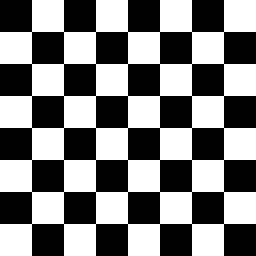

In [69]:
import numpy as np

def create_checkerboard(tile_size=32, num_tiles=8):
    row_even = np.array([0, 1] * (num_tiles // 2))
    row_odd = np.array([1, 0] * (num_tiles // 2))
    board = np.row_stack([row_even if i % 2 == 0 else row_odd for i in range(num_tiles)])
    board = np.kron(board, np.ones((tile_size, tile_size))) * 255
    return Image.fromarray(board.astype('uint8'))

image = create_checkerboard()
image = image.convert("RGB")
display(image)

In [62]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
# pre-processing image
input = processor(images=[image], return_tensors="pt")
# it is a preprocessed model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
#do inference
with torch.no_grad():
    outputs = model(**input)
    # output
# after finishing prediction, they return to each score
scores = outputs.logits
prediction = scores.argmax(-1).item()
print("prediction :", model.config.id2label[prediction])
# predict 5 classes
top5 = torch.topk(F.softmax(scores,dim=-1), k =5)

print("ViT")
for idx, (prob, label_id) in enumerate(zip(top5.values[0], top5.indices[0])):
    label_name = model.config.id2label[label_id.item()]
    print(f"{idx+1}. {label_name:<25}  확률: {prob.item() * 100:.2f}%")



extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")

input = extractor(images = [image], return_tensors="pt")
with torch.no_grad():
    outputs = model(**input)
    scores = outputs.logits
    top5 = torch.topk(F.softmax(scores,dim=-1), k =5)
print("CNN")
for idx, (prob, label_id) in enumerate(zip(top5.values[0], top5.indices[0])):
    label_name = model.config.id2label[label_id.item()]
    print(f"{idx+1}. {label_name:<25}  확률: {prob.item() * 100:.2f}%")







prediction : crossword puzzle, crossword
ViT
1. crossword puzzle, crossword  확률: 46.64%
2. maze, labyrinth            확률: 1.44%
3. jigsaw puzzle              확률: 1.37%
4. lens cap, lens cover       확률: 0.77%
5. doormat, welcome mat       확률: 0.76%
CNN
1. web site, website, internet site, site  확률: 4.35%
2. abaya                      확률: 1.47%
3. nematode, nematode worm, roundworm  확률: 1.34%
4. theater curtain, theatre curtain  확률: 1.33%
5. panpipe, pandean pipe, syrinx  확률: 1.20%


In [70]:
url = "https://images.pexels.com/photos/127028/pexels-photo-127028.jpeg"
image = Image.open(requests.get(url, stream=True).raw)

extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
# pre-processing image
input = extractor(images=image, return_tensors="pt")
# it is a preprocessed model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
#do inference
with torch.no_grad():
    outputs = model(**input)
    # output
# after finishing prediction, they return to each score
scores = outputs.logits
prediction = scores.argmax(-1).item()
print("prediction :", model.config.id2label[prediction])
# predict 5 classes
top5 = torch.topk(F.softmax(scores,dim=-1), k =5)

print("ViT")
for idx, (prob, label_id) in enumerate(zip(top5.values[0], top5.indices[0])):
    label_name = model.config.id2label[label_id.item()]
    print(f"{idx+1}. {label_name:<25}  확률: {prob.item() * 100:.2f}%")



extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")

input = extractor(images = image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**input)
    scores = outputs.logits
    top5 = torch.topk(F.softmax(scores,dim=-1), k =5)
print("CNN")
for idx, (prob, label_id) in enumerate(zip(top5.values[0], top5.indices[0])):
    label_name = model.config.id2label[label_id.item()]
    print(f"{idx+1}. {label_name:<25}  확률: {prob.item() * 100:.2f}%")







/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


prediction : lynx, catamount
ViT
1. lynx, catamount            확률: 36.29%
2. Persian cat                확률: 29.73%
3. Egyptian cat               확률: 9.74%
4. tabby, tabby cat           확률: 3.81%
5. Siamese cat, Siamese       확률: 3.53%


/usr/local/lib/python3.11/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:30: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


CNN
1. lynx, catamount            확률: 87.46%
2. Egyptian cat               확률: 4.51%
3. Persian cat                확률: 1.71%
4. tiger cat                  확률: 0.26%
5. remote control, remote     확률: 0.24%


## In this case, CNN has better performance than ViT, because CNN is stronger to capture local features, especially face, fur, eyes of cat, while Vit split the image to token and they are fed up to transformer(encoder), which capture more global part. Therefore, we can't generalize that ViT has always better performance